# Import Packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# Load Data

In [2]:
YouTubeChannels_Python = pd.read_csv (r'C:\Users\Hanna Bohannon\Documents\DSO105C\DSO105C Datasets/YouTubeChannels_Python.csv')

In [5]:
YouTubeChannels_Python.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


# Wrangle Data

In [7]:
YouTubeChannels_Python1 = YouTubeChannels_Python[['Gr2de', 'Video views']]

In [8]:
YouTubeChannels_Python1.head()

,Gr2de,Video views
0,0,20869786591
1,0,47548839843
2,0,9793305082
3,0,22675948293
4,0,26273668433


# Check Interger

In [9]:
YouTubeChannels_Python1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gr2de        5000 non-null   int64
 1   Video views  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


# Change Grades

In [10]:
def recode (series): 
    if series == 0: 
        return "A plus plus"
    if series == 1: 
        return "A plus"
    if series == 2: 
        return "A"
    if series == 3:
        return "B plus"

YouTubeChannels_Python1['GradeR'] = YouTubeChannels_Python1['Gr2de'].apply(recode)

C:\Users\Hanna Bohannon\AppData\Local\Temp\ipykernel_4616\4244002034.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YouTubeChannels_Python1['GradeR'] = YouTubeChannels_Python1['Gr2de'].apply(recode)


In [11]:
YouTubeChannels_Python1.head()

,Gr2de,Video views,GradeR
0,0,20869786591,A plus plus
1,0,47548839843,A plus plus
2,0,9793305082,A plus plus
3,0,22675948293,A plus plus
4,0,26273668433,A plus plus


# Test Assumptions

# Normality

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Video views', ylabel='Density'>

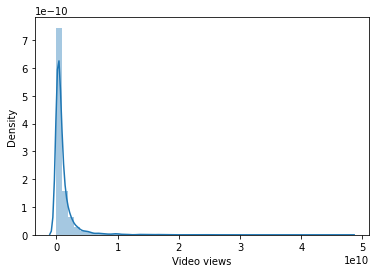

In [12]:
sns.distplot(YouTubeChannels_Python1['Video views'])

In [14]:
YouTubeChannels_Python1.head()

,Gr2de,Video views,GradeR,VideoViewsLOG
0,0,20869786591,A plus plus,23.761568
1,0,47548839843,A plus plus,24.585023
2,0,9793305082,A plus plus,23.004965
3,0,22675948293,A plus plus,23.844571
4,0,26273668433,A plus plus,23.991833


# Homogeneity of Variance

In [20]:
scipy.stats.bartlett(YouTubeChannels_Python1['VideoViewsLOG'], YouTubeChannels_Python1['Gr2de'])

BartlettResult(statistic=4642.606911455518, pvalue=0.0)

# Run the Analysis

In [22]:
YouTubeChannels_Python1.dropna(inplace=True)

C:\Users\Hanna Bohannon\AppData\Local\Temp\ipykernel_4616\932075007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YouTubeChannels_Python1.dropna(inplace=True)


In [23]:
stats.f_oneway(YouTubeChannels_Python1['VideoViewsLOG'][YouTubeChannels_Python1['GradeR']=='A plus plus'],
                   YouTubeChannels_Python1['VideoViewsLOG'][YouTubeChannels_Python1['GradeR']=='A plus'],
               YouTubeChannels_Python1['VideoViewsLOG'][YouTubeChannels_Python1['GradeR']=='A'],
               YouTubeChannels_Python1['VideoViewsLOG'][YouTubeChannels_Python1['GradeR']=='B plus'])

F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

# Post Hocs

In [24]:
postHoc = MultiComparison(YouTubeChannels_Python1['VideoViewsLOG'], YouTubeChannels_Python1['Gr2de'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5233 0.0085   -2.76 -0.2865   True
     0      2   -3.103    0.0 -4.2146 -1.9913   True
     0      3  -4.1291   -0.0 -5.2399 -3.0184   True
     1      2  -1.5797   -0.0  -2.133 -1.0264   True
     1      3  -2.6059   -0.0 -3.1573 -2.0544   True
     2      3  -1.0262   -0.0 -1.1278 -0.9245   True
----------------------------------------------------


# Finding the Mean

In [25]:
YouTubeChannels_Python1.groupby('GradeR').mean()

,Gr2de,Video views,VideoViewsLOG
GradeR,,,
A,2.0,1.676207e+09,20.475580
A plus,1.0,6.053121e+09,22.055279
A plus plus,0.0,2.119909e+10,23.578544
B plus,3.0,5.265217e+08,19.449400


# Conclusion

# Higher ratings = Higher views